# Librerías

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pandas as pd
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import seaborn as sns
import warnings
from sklearn.model_selection import learning_curve
warnings.filterwarnings("ignore")
import time

Context
This dataset was created by webscraping over 200,000 car offers from one of the largest car advertisement sites in Poland.
The code used to collect and clean the data is available at github: github.com/pt3k/otomoto-webscrape

Content
The dataset contains 208,304 observations of 25 variables.

Variables describtion:

ID - unique ID of offer
Price - value of the price
Currency - currency of the price (mostly polish złoty, but also some euro)
Condition - new or used
Vehicle_brand - brand of vehicle in offer
Vehicle_model - model of vehicle in offer
Vehicle_generation - generation of vehicle in offer
Vehicle_version - version of vehicle in offer
Production_year - year of car production
Mileage_km - total distance that the car has driven in kilometers
Power_HP - car engine power in horsepower
Displacement_cm3 - car engine size in cubic centimeters
Fuel_type - car fuel type
CO2_emissions - car CO2 emissions in g/km
Drive - type of car drive
Transmission - type of car transmission
Type - car body style
Doors_number - number of car doors
Colour - car body color
Origin_country - country of origin of the car
First_owner - whether the owner is the first owner
First_registration_date - date of first registration
Offer_publication_date - date of publication of the offer
Offer_location - address provided by the issuer
Features - listed car features (ABS, airbag, parking sensors e.t.c)
Inspiration
I collected this dataset for performing exploratory data analysis and data visualization for my university assignment.
You can use the data to:

Perform EDA;
data visualization;
price prediction;

In [2]:
df = pd.read_csv("Car_sale_ads.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [4]:
df = df[(df["Vehicle_brand"] == "BMW") | (df["Vehicle_brand"] == "Ford") | (df["Vehicle_brand"] == "Volkswagen") | (df["Vehicle_brand"] == "Mercedes-Benz") | 
  (df["Vehicle_brand"] == "Nissan") | (df["Vehicle_brand"] == "Toyota")].copy()

In [5]:
len(df)

78697

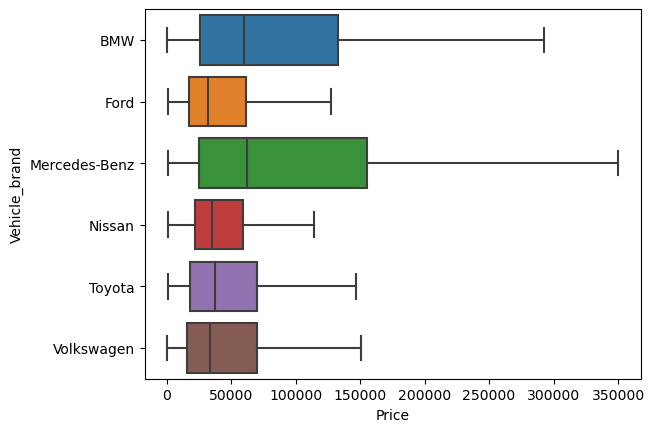

In [6]:
sns.boxplot(df,x="Price",y = "Vehicle_brand",showfliers=False)
plt.savefig("price_model.png")
plt.show()

# Exploración Datos

<AxesSubplot: >

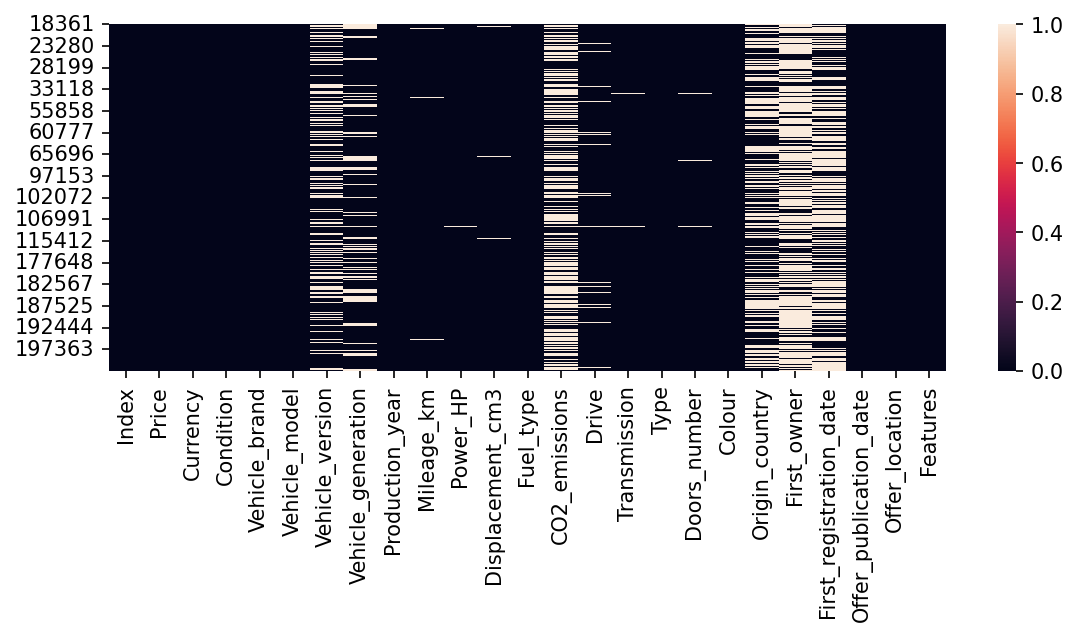

In [7]:
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(df.isnull())

######################################## FUNCIONES ################################################

In [8]:
def OUT_outliers(data,column,n_sigma):
    valor_medio = data[column].mean()
    std = data[column].std()
    minimo = valor_medio - n_sigma*std
    maximo = valor_medio + n_sigma*std
    mascara_outliers = np.logical_or(data[column] < minimo, data[column] > maximo)
    return mascara_outliers



def lollipop_plot(frecuency, title, figsize=(8, 6)):
    # Stem plot
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.stem(frecuency.index, frecuency.values, orientation="horizontal")
    plt.title(title)
    
    # Mostrar el gráfico
    plt.show()
    
def grafica_curva_validacion(X_Train,y_train,model,marca):
    
    # Calcular la curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(model, X_Train, y_train, cv=5,scoring = "r2")

    # Calcular las medias y desviaciones estándar de los puntajes
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Graficar la curva de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.title(f"Curva de Aprendizaje {marca}")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("r2")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="R2 de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="R2 de validación")
    plt.legend(loc="best")
    plt.show()

###################################################################################################

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78697 entries, 18361 to 202274
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    78697 non-null  int64  
 1   Price                    78697 non-null  int64  
 2   Currency                 78697 non-null  object 
 3   Condition                78697 non-null  object 
 4   Vehicle_brand            78697 non-null  object 
 5   Vehicle_model            78697 non-null  object 
 6   Vehicle_version          51942 non-null  object 
 7   Vehicle_generation       61804 non-null  object 
 8   Production_year          78697 non-null  int64  
 9   Mileage_km               78293 non-null  float64
 10  Power_HP                 78421 non-null  float64
 11  Displacement_cm3         77880 non-null  float64
 12  Fuel_type                78697 non-null  object 
 13  CO2_emissions            34959 non-null  float64
 14  Drive            

In [10]:
df.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,78697.00,78697.00,78697.00,78293.00,78421.00,77880.00,34959.00,78153.00
mean,109525.68,70562.52,2011.76,150086.92,162.69,2007.93,572291.64,4.58
std,65075.49,93037.12,7.31,826705.32,83.18,766.63,106967166.47,0.81
min,18361.00,500.00,1915.00,1.00,1.00,400.00,1.00,1.00
25%,55856.00,19800.00,2008.00,59500.00,114.00,1595.00,121.00,4.00
50%,102068.00,39900.00,2012.00,150980.00,143.00,1968.00,140.00,5.00
75%,182561.00,84900.00,2017.00,217000.00,184.00,1998.00,166.00,5.00
max,202274.00,6999000.00,2021.00,206549168.00,1398.00,7600.00,20000000000.00,55.00


#  Limpieza de Datos

In [11]:
reporte = {}

## PRICE



In [12]:
# Algunas instancias de la columna Price estan en  Zloty polaco , hace la conversion de PLN to EUR 

In [13]:
df["Price"] = np.where(df["Currency"]=="PLN",df["Price"] * 0.22483499,df["Price"])

In [14]:
# hacer conversion a partir de la fecha

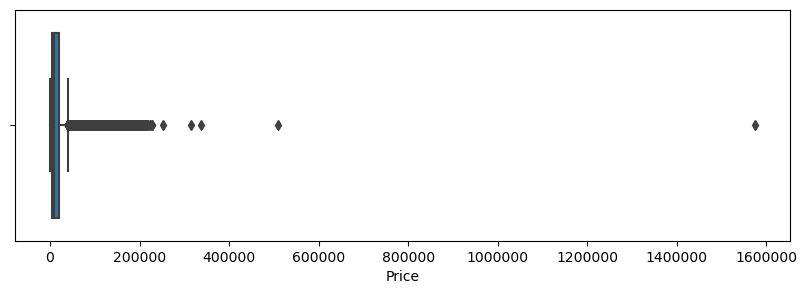

In [15]:

plt.figure(figsize=(10, 3))
sns.boxplot(x= df["Price"])
plt.ticklabel_format(style='plain', axis='x')


In [16]:
mask = OUT_outliers(df,"Price",5)

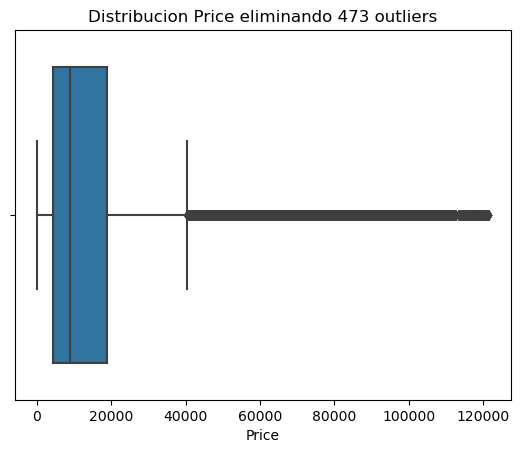

In [17]:
sns.boxplot(df[mask== False],x= "Price").set(title = f"Distribucion Price eliminando {mask.sum()} outliers")
plt.ticklabel_format(style='plain', axis='x')


In [18]:
df = df[mask == False]

In [19]:
reporte["Price"] = {
    "outliers": mask.sum(),
    "nulos": df["Price"].isna().sum()}


## Currency (finish)
* Ponemos todas las instancias a EUR

In [20]:
df["Currency"] = np.where(df["Currency"]=="PLN","EUR",df["Currency"])

In [21]:


reporte["Currency"] = {
    "outliers": 0,
    "nulos":df["Price"].isna().sum()}
df.drop(columns = "Currency",inplace = True)

## Condition (finished)

<AxesSubplot: xlabel='Condition', ylabel='count'>

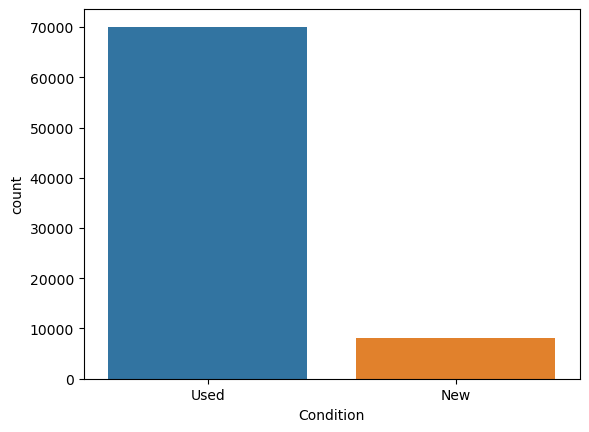

In [22]:
sns.countplot(df,x="Condition")

In [23]:
df["Condition"].map({"New":1,"Used":0})
reporte["Condition"] = {
    "outliers": 0,
    "nulos": df["Condition"].isna().sum()}


## Vehicle_brand (finished)

[Text(0.5, 1.0, 'nº vehiculos por Marca')]

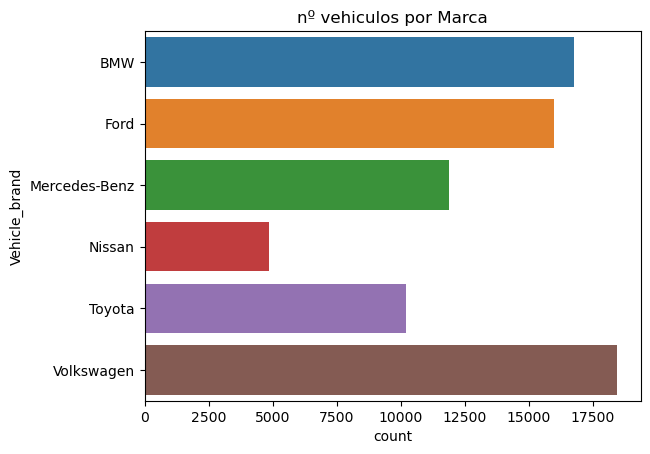

In [24]:
sns.countplot(df,y="Vehicle_brand").set(title = "nº vehiculos por Marca")

In [25]:
df["Vehicle_brand"].isna().sum()

0

In [26]:


reporte["Vehicle_brand"] = {
    "outliers": 0,
    "nulos": df["Vehicle_brand"].isna().sum()}



## Vehicle_model (finished)

In [27]:
df["Vehicle_model"].isna().sum()

0

In [28]:
df["Vehicle_model"].value_counts()

Seria 3      4570
Golf         4164
Passat       4049
Focus        3678
Seria 5      3658
             ... 
Interstar       1
Cressida        1
Paseo           1
Matrix          1
Frontier        1
Name: Vehicle_model, Length: 260, dtype: int64

In [29]:
df["Vehicle_model"].nunique()

260

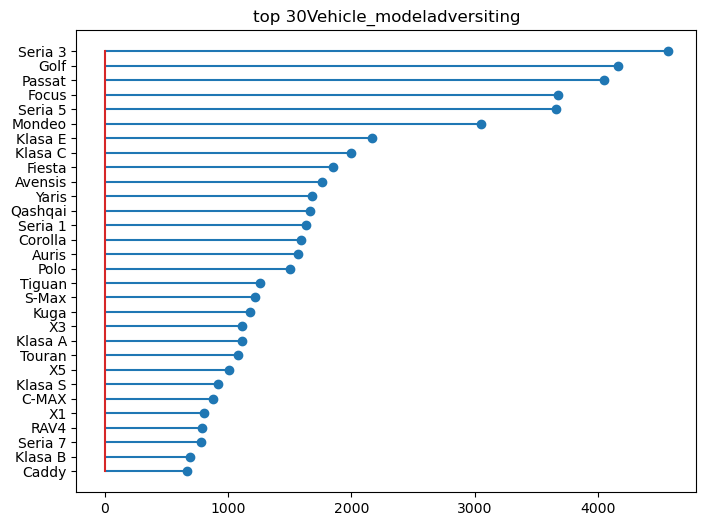

In [30]:
frecuencia = df["Vehicle_model"].value_counts().sort_values()[-30:]
lollipop_plot(frecuencia,"top 30Vehicle_modeladversiting")

In [31]:



reporte["Vehicle_model"] = {
    "outliers": 0,
    "nulos": df["Vehicle_model"].isna().sum()}



## Vehicle_version

In [32]:
df["Vehicle_version"].isna().sum()

26540

In [33]:
# eliminamos la columna Vegicle_version, puesto que tiene mucha cardinlidad y no nos aporta mucho en nuestro modelo

In [34]:
df["Vehicle_version"].nunique()

6701

In [35]:
df.drop(columns = "Vehicle_version",inplace = True)

## Vehicle_generation

In [36]:
df["Vehicle_generation"].nunique()

257

In [37]:
df["Vehicle_generation"].isna().sum()

16605

In [38]:
df["Vehicle_generation"].value_counts()

E90/E91/E92/E93 (2005-2012)    1763
B8 (2014-)                     1728
Mk3 (2010-)                    1660
II (2012-)                     1539
F10/F11 (2009-2017)            1418
                               ... 
Mk2 (1994-1998)                   1
I (1989-1992)                     1
Mk3 (1980-1986)                   1
Mk3 (1989-1996)                   1
I (1983-1993)                     1
Name: Vehicle_generation, Length: 257, dtype: int64

In [39]:
# elimino columna Vehicle_generation



reporte["Vehicle_generation"] = {
    "outliers": 0,
    "nulos": df["Vehicle_generation"].isna().sum()}
df.drop(columns = "Vehicle_generation",inplace = True)

## Production_year (finished)

In [40]:
df["Production_year"].nunique()

77

In [41]:
df["Production_year"].isna().sum()

0

<AxesSubplot: xlabel='count', ylabel='Production_year'>

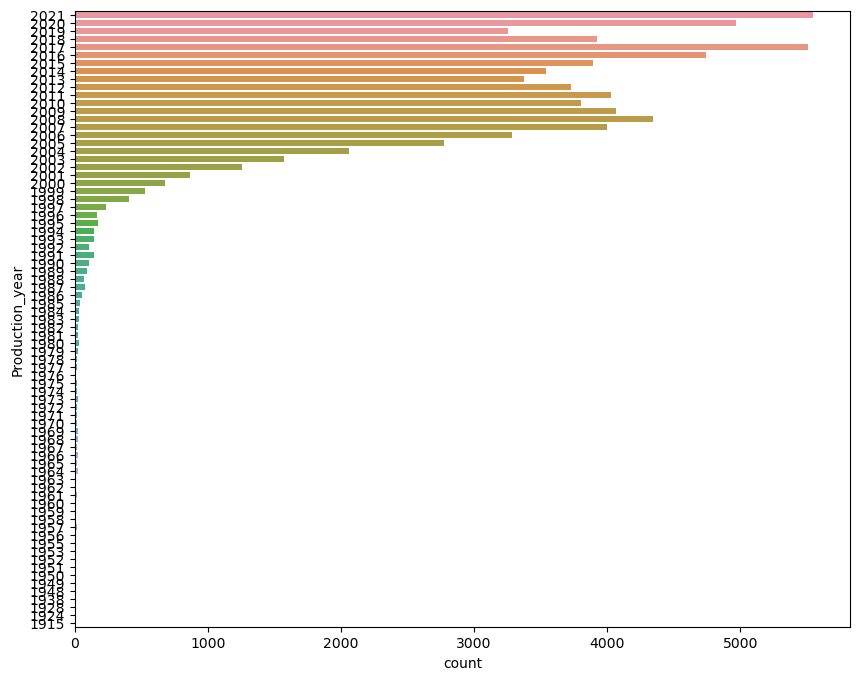

In [42]:
plt.figure(figsize=(10, 8))

plt.ticklabel_format(style='plain', axis='y')
sns.countplot(data=df, y="Production_year", order=df["Production_year"].value_counts().index.sort_values(ascending=False))


In [43]:
# por el momento lo dejamos y pensamos que hacemos mas adelante
reporte["Production_year"] = {
    "outliers": 0,
    "nulos": df["Production_year"].isna().sum()}



## Mileage_km

In [44]:
df["Mileage_km"].isna().sum()

380

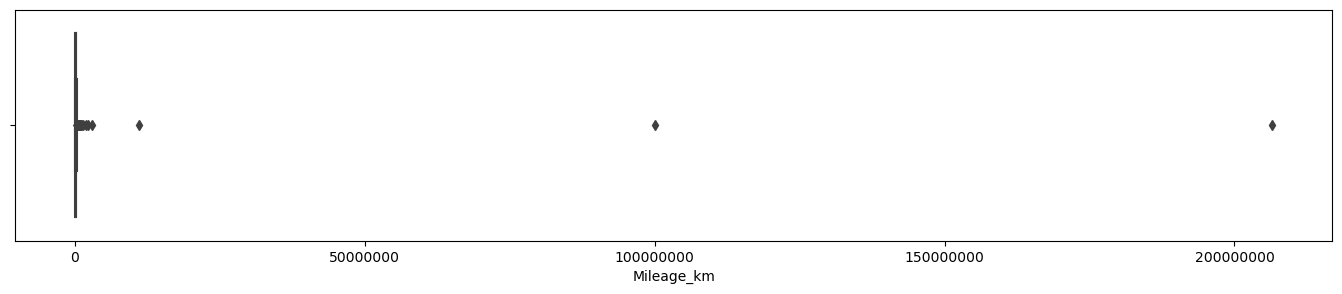

In [45]:
plt.figure(figsize=(17, 3))
sns.boxplot(data=df, x="Mileage_km")
plt.ticklabel_format(style='plain', axis='x')

In [46]:
mask_outliers_Mileage_km_01sigma = OUT_outliers(df,"Mileage_km",0.1)
mask_outliers_Mileage_km_05simg = OUT_outliers(df,"Mileage_km",0.5)
mask_outliers_Mileage_km_1sigma = OUT_outliers(df,"Mileage_km",1)
mask_outliers_Mileage_km_2sigma = OUT_outliers(df,"Mileage_km",2)

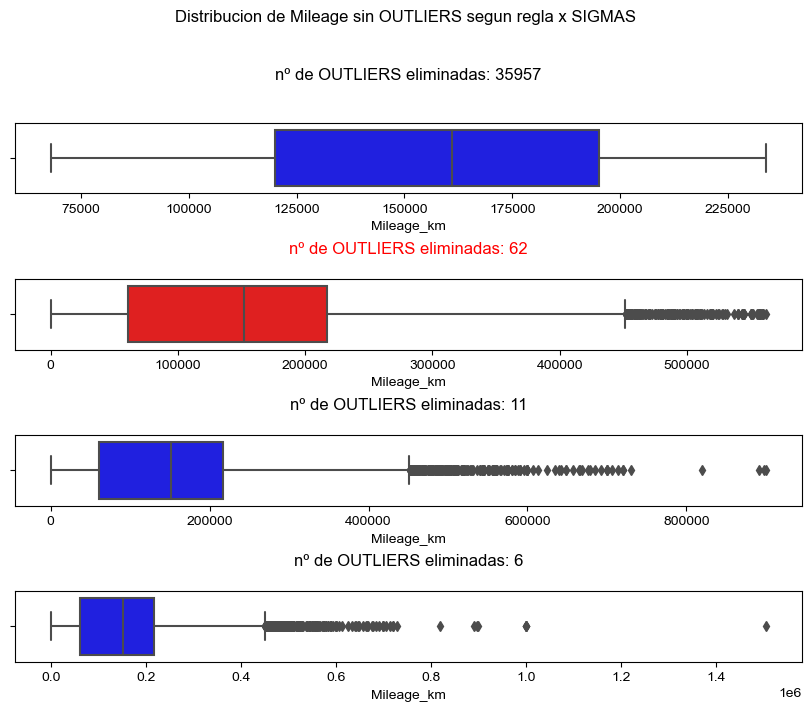

<Figure size 800x300 with 0 Axes>

In [47]:

fig, axes = plt.subplots(4, figsize=(8, 7), constrained_layout=True)
plt.figure(figsize=(8, 3))
fig.suptitle('Distribucion de Mileage sin OUTLIERS segun regla x SIGMAS\n\n')

# Configurar el estilo de Seaborn (opcional)
sns.set(style="darkgrid")

# Crear los gráficos de boxplot y establecer los títulos con fondo rojo
sns.boxplot(ax=axes[0], color="blue", data=df[mask_outliers_Mileage_km_01sigma == False], x='Mileage_km')
axes[0].set_title(f"nº de OUTLIERS eliminadas: {mask_outliers_Mileage_km_01sigma.sum()}\n\n")
sns.boxplot(ax=axes[1], color="red", data=df[mask_outliers_Mileage_km_05simg == False], x='Mileage_km')
axes[1].set_title(f"nº de OUTLIERS eliminadas: {mask_outliers_Mileage_km_05simg.sum()}\n", color='red')
sns.boxplot(ax=axes[2], color="blue", data=df[mask_outliers_Mileage_km_1sigma == False], x='Mileage_km')
axes[2].set_title(f"nº de OUTLIERS eliminadas: {mask_outliers_Mileage_km_1sigma.sum()}\n")
sns.boxplot(ax=axes[3], color="blue", data=df[mask_outliers_Mileage_km_2sigma == False], x='Mileage_km')
axes[3].set_title(f"nº de OUTLIERS eliminadas: {mask_outliers_Mileage_km_2sigma.sum()}\n")

# Mostrar los gráficos
plt.savefig("Mileage_km.png")

plt.show()


- eliminamos esas 75 instancias , 1 desvio  de valores atipicos

In [48]:
df = df[mask_outliers_Mileage_km_1sigma == False]


In [49]:

reporte["Mileage_km"] = {
    "outliers": mask_outliers_Mileage_km_1sigma.sum(),
    "nulos": df["Mileage_km"].isna().sum()}


- rellenamosmas adelante con un pipline

In [50]:
#mode = df["Mileage_km"].mode()

In [51]:
#df["Mileage_km"] = np.where(df["Mileage_km"].isna(),mode,df["Mileage_km"])

In [52]:
# por el momento lo dejamos y pensamos que hacemos mas adelante


## Power_HP (finished)

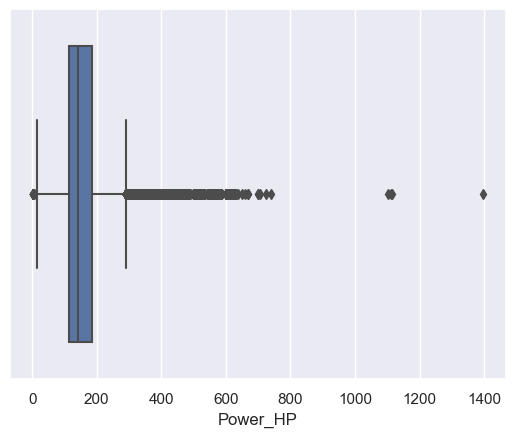

In [53]:
sns.boxplot(x=df["Power_HP"])
plt.savefig("hp.png")
plt.show()


In [54]:
mask = OUT_outliers(df,"Power_HP",5)

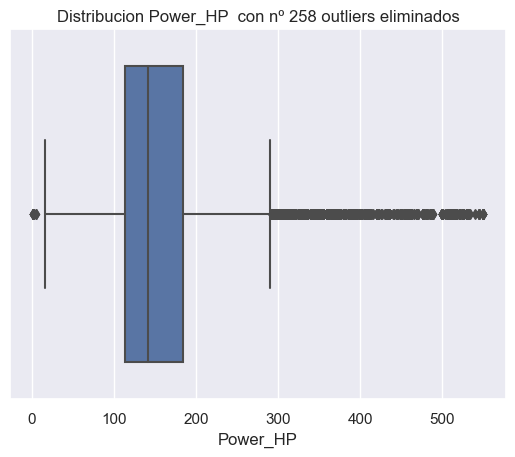

In [55]:
sns.boxplot(x=df[mask == False]["Power_HP"]).set(title=f"Distribucion Power_HP  con nº {mask.sum()} outliers eliminados")

plt.show()


In [56]:
df["Power_HP"].isna().sum()

275

In [57]:
df = df[mask == False]

In [58]:
# relleno valores nulos con la media de Horse POWER en cada fila que sea nula
df_media_HP_POR_Vehicle_model = df.groupby("Vehicle_model").agg(Media_HORSE_POWER_by_Vehcicle_Model =("Power_HP","mean"))
df_media_HP_POR_Vehicle_model.reset_index(inplace = True)
df_media_HP_POR_Vehicle_model

,Vehicle_model,Media_HORSE_POWER_by_Vehcicle_Model
0,100 NX,143.00
1,1M,316.00
2,200 SX,235.00
3,280,167.91
4,280 ZX,150.00
...,...,...
255,Z4,224.41
256,i3,174.73
257,i8,306.39
258,iQ,74.29


In [59]:
df = df.merge(df_media_HP_POR_Vehicle_model.copy(), left_on='Vehicle_model', right_on='Vehicle_model')

In [60]:
df[df["Power_HP"].isna()][["Power_HP","Media_HORSE_POWER_by_Vehcicle_Model"]]

,Power_HP,Media_HORSE_POWER_by_Vehcicle_Model
1003,NaN,172.05
1125,NaN,172.05
1171,NaN,172.05
1609,NaN,172.05
1797,NaN,172.05
...,...,...
75984,NaN,252.33
76346,NaN,124.11
77390,NaN,109.28
77752,NaN,64.74


In [61]:
df["Power_HP"] = df["Power_HP"].fillna(value = df["Media_HORSE_POWER_by_Vehcicle_Model"])

In [62]:
df.drop(columns = "Media_HORSE_POWER_by_Vehcicle_Model",inplace = True)

In [63]:
reporte["Power_HP"] = {
    "outliers": mask.sum(),
    "nulos": df["Power_HP"].isna().sum()}





In [64]:
#mode = df["Power_HP"].mode()
#df["Power_HP"] = np.where(df["Power_HP"].isna(),mode,df["Power_HP"])
#df["Power_HP"].isna().sum()

## Displacement_cm3

<AxesSubplot: xlabel='Displacement_cm3'>

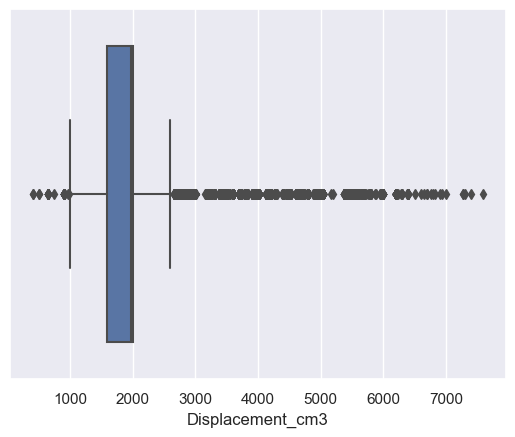

In [65]:
sns.boxplot(x=df["Displacement_cm3"])

Los 6 motores más grandes en cc
- 1º Bugatti Chiron – 7.993 cc
- 2º Bentley Mulsanne – 6.750 cc
- 3º Rolls-Royce Phantom y Cullinan – 6.749 cc

Eliminaremos outliers hasta 6000cc

In [66]:
mask = OUT_outliers(df,"Displacement_cm3",6)


<AxesSubplot: xlabel='Displacement_cm3'>

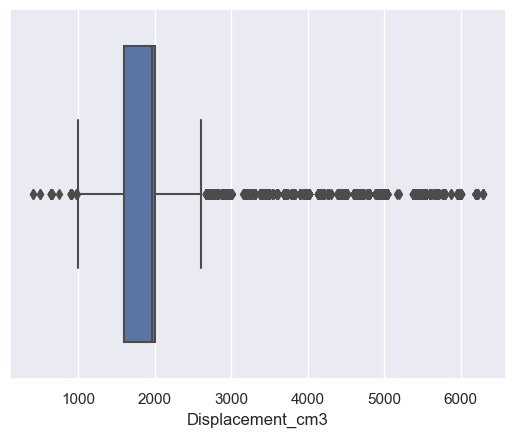

In [67]:
sns.boxplot(df[mask == False],x="Displacement_cm3")

In [68]:


reporte["Displacement_cm3"] = {
    "outliers": mask.sum(),
    "nulos": df["Displacement_cm3"].isna().sum()}



- Eliminamos 439 instancias e imputaremos los nulos mas adelante en un pipelie

In [69]:
df = df[mask ==False]

## Fuel_type (finished)

In [70]:
df["Fuel_type"].value_counts()

Diesel            38646
Gasoline          33461
Hybrid             2869
Gasoline + LPG     2290
Electric            631
Gasoline + CNG       33
Name: Fuel_type, dtype: int64

In [71]:
df["Fuel_type"].isna().sum()

0

[Text(0.5, 1.0, 'Grafico de barras por Fuel_type')]

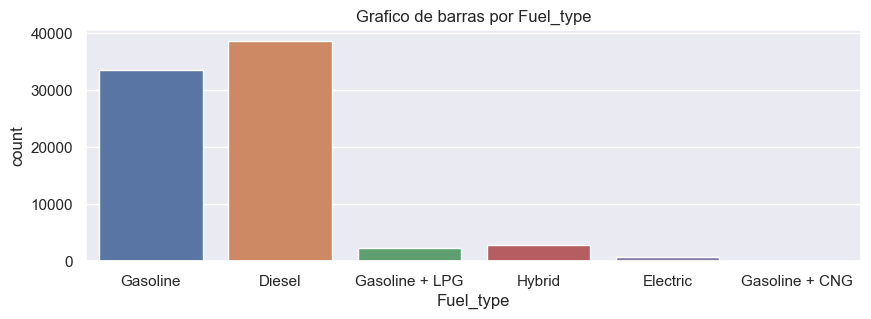

In [72]:
plt.figure(figsize=(10,3))
sns.countplot(df,x="Fuel_type").set(title= "Grafico de barras por Fuel_type")

In [73]:


reporte["Fuel_type"] = {
    "outliers": 0,
    "nulos": df["Fuel_type"].isna().sum()}



## CO2_emissions

In [74]:
df["CO2_emissions"]


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
77950   NaN
77951   NaN
77952   NaN
77953   NaN
77954   NaN
Name: CO2_emissions, Length: 77930, dtype: float64

In [75]:
df["CO2_emissions"].isna().sum()

43316

In [76]:
41479/len(df)

0.5322597202617734

In [77]:


reporte["CO2_emissions"] = {
    "outliers": 0,
    "nulos": df["CO2_emissions"].isna().sum()}
df.drop(columns = "CO2_emissions",inplace = True)

## Drive

In [78]:
df["Drive"].value_counts()

Front wheels                    43742
Rear wheels                     14788
4x4 (permanent)                  7021
4x4 (attached automatically)     5725
4x4 (attached manually)          1040
Name: Drive, dtype: int64

In [79]:
df["Drive"].isna().sum()

5614

In [80]:


reporte["Drive"] = {
    "outliers": 0,
    "nulos": df["Drive"].isna().sum()}


## Transmission

In [81]:
df["Transmission"].value_counts()

Manual       44242
Automatic    33492
Name: Transmission, dtype: int64

In [82]:
df["Transmission"].isna().sum()

196

In [83]:
# solo 472 nulos, ,veremos que hacemos 

In [84]:


reporte["Transmission"] = {
    "outliers": 0,
    "nulos": df["Transmission"].isna().sum()}


## Type (finished)

In [85]:
df["Type"].isna().sum()

0

In [86]:
df["Type"].value_counts()

sedan            15383
SUV              15115
station_wagon    14490
compact          11223
minivan           9004
city_cars         6775
coupe             3264
small_cars        1505
convertible       1171
Name: Type, dtype: int64

<AxesSubplot: xlabel='Type', ylabel='count'>

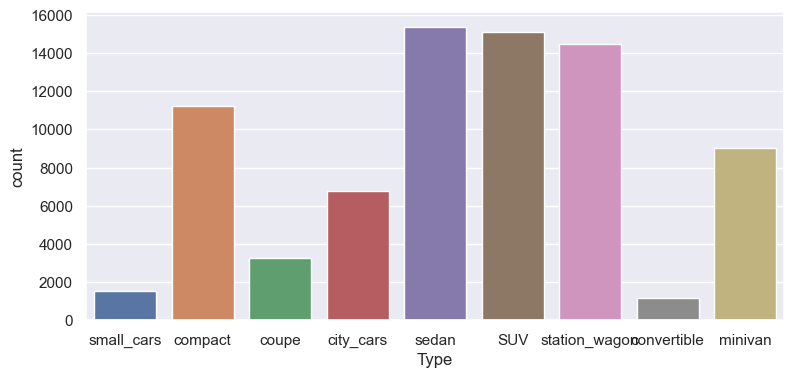

In [87]:
plt.figure(figsize=(9,4))
sns.countplot(df,x="Type")

In [88]:



reporte["Type"] = {
    "outliers": 0,
    "nulos": df["Type"].isna().sum()}


## Doors_number (finished)

In [89]:
df["Doors_number"].value_counts()

5.00     56386
4.00     13454
3.00      4139
2.00      3389
6.00        19
1.00         1
9.00         1
55.00        1
Name: Doors_number, dtype: int64

In [90]:
df["Doors_number"].isna().sum()

540

In [91]:

df = df.drop(df[df["Doors_number"] == 6.00].index)
df = df.drop(df[df["Doors_number"] == 1.00].index)

In [92]:
df["Doors_number"].value_counts()

5.00     56386
4.00     13454
3.00      4139
2.00      3389
9.00         1
55.00        1
Name: Doors_number, dtype: int64

In [93]:
# en base al modelo del coche relleno los valores de la columna nºde puertas con la media del modelo de coche al que corresponde
df_mode_DOORS_POR_Vehicle_model = df.groupby("Vehicle_model").agg(Mean_DOORS_POR_Vehicle_model =("Doors_number","mean"))
df_mode_DOORS_POR_Vehicle_model.reset_index(inplace = True)

df_mode_DOORS_POR_Vehicle_model["Mean_DOORS_POR_Vehicle_model"] = round(df_mode_DOORS_POR_Vehicle_model["Mean_DOORS_POR_Vehicle_model"])
df_mode_DOORS_POR_Vehicle_model

,Vehicle_model,Mean_DOORS_POR_Vehicle_model
0,100 NX,3.00
1,1M,4.00
2,200 SX,2.00
3,280,3.00
4,280 ZX,3.00
...,...,...
254,Z4,2.00
255,i3,5.00
256,i8,2.00
257,iQ,3.00


In [94]:
df = df.merge(df_mode_DOORS_POR_Vehicle_model.copy(), left_on='Vehicle_model', right_on='Vehicle_model')

In [95]:
df["Doors_number"] = df["Doors_number"].fillna(value = df["Mean_DOORS_POR_Vehicle_model"])

In [96]:
df.drop(columns = {"Mean_DOORS_POR_Vehicle_model"},inplace = True)

In [97]:

reporte["Doors_number"] = {
    "outliers": 6,
    "nulos": df["Doors_number"].isna().sum()}


## Colour (finished)

In [98]:
df["Colour"].value_counts()

black       20425
silver      12602
white       11954
gray        11279
blue         8052
other        4764
red          2663
brown        1864
green        1119
burgundy     1115
golden        916
beige         673
violet        260
yellow        224
Name: Colour, dtype: int64

In [99]:
df["Colour"].isna().sum()

0

[Text(0.5, 1.0, 'Grafico por Colour')]

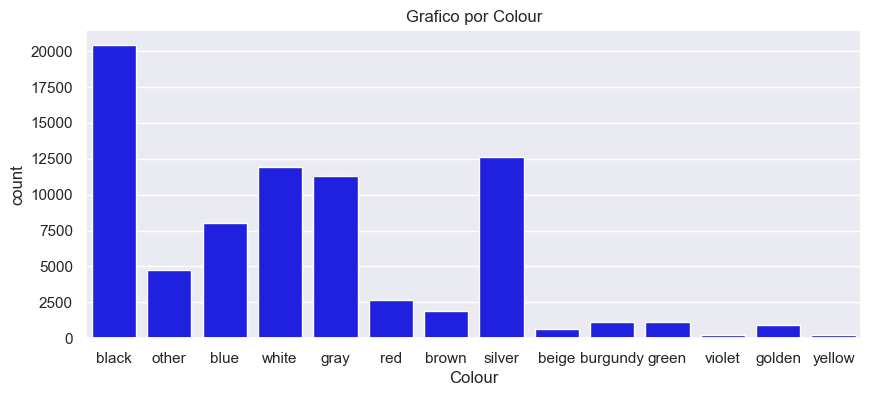

In [100]:
plt.figure(figsize=(10,4))
sns.countplot(df,x="Colour",color = "blue").set(title = "Grafico por Colour")

In [101]:


reporte["Colour"] = {
    "outliers": 0,
    "nulos": df["Colour"].isna().sum()}


## Origin_country

<AxesSubplot: xlabel='count', ylabel='Origin_country'>

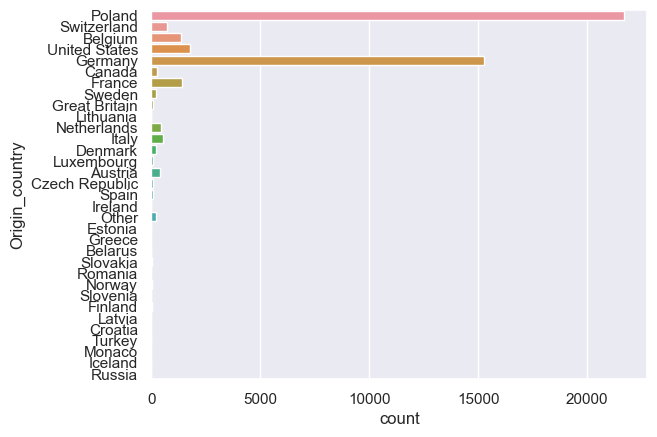

In [102]:
sns.countplot(df,y="Origin_country")

In [103]:
df["Origin_country"].isna().sum()

33088

In [104]:




reporte["Origin_country"] = {
    "outliers":0,
    "nulos": df["Origin_country"].isna().sum()}
df.drop(columns = "Origin_country",inplace = True)

## First_owner

In [105]:
df["First_owner"].value_counts()

Yes    24189
Name: First_owner, dtype: int64

In [106]:
df["First_owner"].unique()
# reemplazar nan por no  0 ó 1

array([nan, 'Yes'], dtype=object)

In [107]:
df["First_owner"] = np.where(df["First_owner"].isna(),"No",df["First_owner"])

In [108]:
df["First_owner"].isna().sum()

0

In [109]:
df["First_owner"].value_counts()

No     53721
Yes    24189
Name: First_owner, dtype: int64

In [110]:


reporte["First_owner"] = {
    "outliers": 0,
    "nulos": df["First_owner"].isna().sum()}

## First_registration_date  

In [111]:


reporte["First_registration_date"] = {
    "outliers": 0,
    "nulos": df["First_registration_date"].isna().sum()}

df.drop(columns = "First_registration_date",inplace = True)

## Offer_publication_date   (finished)

In [112]:
df["Offer_publication_date"].isna().sum()

0

In [113]:

reporte["Offer_publication_date"] = {
    "outliers": 0,
    "nulos": df["Offer_publication_date"].isna().sum()}

In [114]:
df.drop(columns = "Offer_publication_date",inplace = True)

## Offer_location  (finished)

In [115]:


reporte["Offer_location"] = {
    "outliers": 0,
    "nulos": df["Offer_location"].isna().sum()}


In [116]:
df["Offer_location"]

0                   Krotoszyn, krotoszyński, Wielkopolskie
1                      Staszów, staszowski, Świętokrzyskie
2                          Warszawa, Mazowieckie, Żoliborz
3                                    Łódź, Łódzkie, Widzew
4                          Skawina, krakowski, Małopolskie
                               ...                        
77905                          Gdów, wielicki, Małopolskie
77906                        Jawor, jaworski, Dolnośląskie
77907                Warszawa, Mazowieckie, Praga-Południe
77908                       Dzbanki, bełchatowski, Łódzkie
77909    UL. CHEMICZNA, 11B - 22-100 Chełm, Lubelskie (...
Name: Offer_location, Length: 77910, dtype: object

In [117]:
# geopandas, plotly

In [118]:
df.drop(columns = "Offer_location",inplace = True)

# REPORTE de outliers eliminados y valores nulos

In [119]:

reporte = pd.DataFrame(reporte).T
reporte.reset_index(inplace=True)
reporte = reporte.rename(columns={'index': 'feature'})

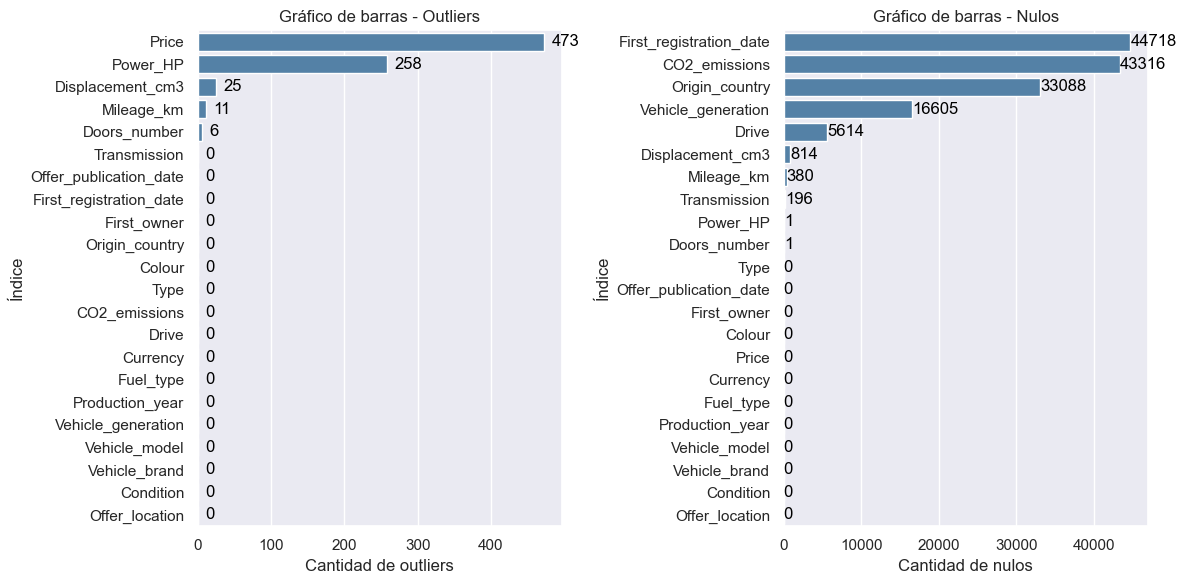

In [120]:



fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para outliers
df_outliers = reporte.sort_values(by='outliers', ascending=False)
sns.barplot(data=df_outliers, x='outliers', y='feature', color='steelblue', ax=axes[0])
axes[0].set_xlabel('Cantidad de outliers')
axes[0].set_ylabel('Índice')
axes[0].set_title('Gráfico de barras - Outliers')

# Agregar número total en cada barra de outliers
for i, v in enumerate(df_outliers['outliers']):
    axes[0].text(v + 10, i, str(v), color='black', va='center')

# Gráfico de barras para nulos
df_nulos = reporte.sort_values(by='nulos', ascending=False)
sns.barplot(data=df_nulos, x='nulos', y='feature', color='steelblue', ax=axes[1])
axes[1].set_xlabel('Cantidad de nulos')
axes[1].set_ylabel('Índice')
axes[1].set_title('Gráfico de barras - Nulos')

# Agregar número total en cada barra de nulos
for i, v in enumerate(df_nulos['nulos']):
    axes[1].text(v + 10, i, str(v), color='black', va='center')

plt.tight_layout()

plt.show()

# Features 

In [121]:
df.reset_index(inplace = True)

In [122]:
df.head()

,index,Index,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,First_owner,Features
0,0,18361,16750.21,Used,BMW,1M,2018,32500.00,340.00,2989.00,Gasoline,NaN,Automatic,small_cars,5.00,black,No,[]
1,1,18362,4474.22,Used,BMW,1M,2009,196000.00,130.00,1995.00,Gasoline,Front wheels,Manual,compact,5.00,black,No,"['ABS', 'Electric front windows', 'Drivers air..."
2,2,18363,71947.20,Used,BMW,1M,2011,37000.00,340.00,3000.00,Gasoline,Rear wheels,Manual,coupe,2.00,other,No,[]
3,3,18364,44944.51,Used,BMW,1M,2018,24500.00,340.00,2998.00,Gasoline,4x4 (attached automatically),Automatic,compact,5.00,black,Yes,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,18365,29003.71,Used,BMW,1M,2016,127000.00,326.00,2979.00,Gasoline,4x4 (attached automatically),Automatic,city_cars,5.00,black,No,"['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [123]:
# por cada caracteristica que exista en la columna features, crearemos una columna con el nommbre de la columna y le asignaremos 1
"""
import ast

for i, features in enumerate(df["Features"]):
    feature_list = ast.literal_eval(features)
    
    for feature in feature_list:
        df.loc[i, feature] = 1
"""

'\nimport ast\n\nfor i, features in enumerate(df["Features"]):\n    feature_list = ast.literal_eval(features)\n    \n    for feature in feature_list:\n        df.loc[i, feature] = 1\n'

In [124]:
df.drop(columns = "Index",inplace = True)
df.drop(columns = "index",inplace = True)


In [125]:
df["Features"][0]

'[]'

In [126]:
df.head(3)

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,First_owner,Features
0,16750.21,Used,BMW,1M,2018,32500.00,340.00,2989.00,Gasoline,NaN,Automatic,small_cars,5.00,black,No,[]
1,4474.22,Used,BMW,1M,2009,196000.00,130.00,1995.00,Gasoline,Front wheels,Manual,compact,5.00,black,No,"['ABS', 'Electric front windows', 'Drivers air..."
2,71947.20,Used,BMW,1M,2011,37000.00,340.00,3000.00,Gasoline,Rear wheels,Manual,coupe,2.00,other,No,[]


In [127]:
df.iloc[:,16:].columns


Index([], dtype='object')

In [128]:
lista_features = list(df.iloc[:,16:].columns)

In [129]:
for feature in lista_features:
    df[feature] = np.where(df[feature].isna()== True,0,df[feature])

In [130]:
df.drop(columns = "Features",inplace = True)

In [131]:
#df.to_csv("checkpoint.csv")
df = pd.read_csv("checkpoint.csv")

# Creación del modelo

## PIPELINE

In [132]:
df.head()

,Unnamed: 0,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,First_owner,ABS,Electric front windows,Drivers airbag,Power steering,ASR (traction control),Electrochromic side mirrors,Manual air conditioning,Tinted windows,CD,Electrically adjustable mirrors,Passengers airbag,Alarm,Blind spot sensor,Electrochromic rear view mirror,On-board computer,Velor upholstery,Central locking,Immobilizer,Factory radio,Alloy wheels,Twilight sensor,Electric rear windows,Air curtains,Multifunction steering wheel,Rain sensor,Rear parking sensors,AUX socket,Isofix,Dual zone air conditioning,Shift paddles,Speed limiter,Front side airbags,Daytime running lights,Leather upholstery,Lane assistant,Electrically adjustable seats,SD socket,Rear view camera,MP3,Heated side mirrors,LED lights,Cruise control,Bluetooth,Front parking sensors,ESP(stabilization of the track),USB socket,Automatic air conditioning,GPS navigation,Heated front seats,Start-Stop system,Fog lights,Adjustable suspension,Parking assistant,DVD player,Airbag protecting the knees,Rear side airbags,Four-zone air conditioning,Xenon lights,Sunroof,Panoramic roof,Heated windscreen,HUD(head-up display),Hook,Auxiliary heating,Heated rear seats,Active cruise control,CD changer,Aftermarket radio,Roof rails,TV tuner
0,0,16750.21,Used,BMW,1M,2018,32500.00,340.00,2989.00,Gasoline,NaN,Automatic,small_cars,5.00,black,No,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,4474.22,Used,BMW,1M,2009,196000.00,130.00,1995.00,Gasoline,Front wheels,Manual,compact,5.00,black,No,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,71947.20,Used,BMW,1M,2011,37000.00,340.00,3000.00,Gasoline,Rear wheels,Manual,coupe,2.00,other,No,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,44944.51,Used,BMW,1M,2018,24500.00,340.00,2998.00,Gasoline,4x4 (attached automatically),Automatic,compact,5.00,black,Yes,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,29003.71,Used,BMW,1M,2016,127000.00,326.00,2979.00,Gasoline,4x4 (attached automatically),Automatic,city_cars,5.00,black,No,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [133]:
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
set_config(display="diagram")
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
from sklearn.preprocessing import FunctionTransformer

In [134]:
df["Doors_number"].dropna(inplace = True)
df.drop(columns = "Unnamed: 0", inplace = True)

In [135]:
X = df[df.columns[1:]].copy()
y = df["Price"].copy()

In [136]:
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

In [137]:
feat = list(df.columns[:15])

In [138]:
df_caracteristicas = df.drop(columns = feat).copy()

In [139]:
def modelPipeline(X_train, X_test, y_train, y_test):
    pipelines = []
    knn = KNeighborsRegressor()
    svr = SVR()
    mlp = MLPRegressor(max_iter=500)
    dt = DecisionTreeRegressor()
    rf = RandomForestRegressor()
    xgb = XGBRegressor(verbosity=0)
    
    
    cat_features = ["Condition","Vehicle_brand","Fuel_type","Drive","Transmission","Type",
             "First_owner",'ABS','Electric front windows','Drivers airbag','Power steering',
             'ASR (traction control)','Rear view camera','Heated side mirrors','CD','Electrically adjustable mirrors','Passengers airbag', 'Alarm',
             'Bluetooth','Automatic air conditioning','Airbag protecting the knees','Central locking','Immobilizer','Factory radio','Alloy wheels',
             'Rain sensor','On-board computer','Multifunction steering wheel','AUX socket','Xenon lights','USB socket','MP3','ESP(stabilization of the track)','Front side airbags',
             'Rear parking sensors' ,'Isofix','Air curtains','Tinted windows','Daytime running lights','Rear side airbags','Fog lights','Twilight sensor','GPS navigation',
             'LED lights','Manual air conditioning','Start-Stop system','Electrochromic rear view mirror','Velor upholstery','Electrochromic side mirrors','SD socket',
             'Dual zone air conditioning','Adjustable suspension','Panoramic roof','Sunroof','Front parking sensors','Heated front seats','Leather upholstery','Electrically adjustable seats',
             'Cruise control' ,'Parking assistant','Speed limiter','Heated windscreen','Electric rear windows','Shift paddles','Blind spot sensor','Aftermarket radio','DVD player',
             'CD changer','Auxiliary heating','Heated rear seats','Four-zone air conditioning','TV tuner','Roof rails','Active cruise control','Hook','Lane assistant','HUD(head-up display)']

    num_features = ["Mileage_km","Power_HP","Displacement_cm3"]
    #creo pileline para las variables numericas
    numeric_transformer = Pipeline(
                          steps=[("imputer", SimpleImputer(strategy="mean",add_indicator= True)), 
                                 ("scaler", StandardScaler())]
                          )
    #creo pileline para las variables categóricas
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ]
    )


    # rear un objeto utilizando la clase ColumnTransformer que nos permite realizar transformaciones en las columnas, que justamente es lo que buscamos
    column_processor = ColumnTransformer(
        transformers=[
            ("numéricas", numeric_transformer, num_features),
            ("categóricas", categorical_transformer, cat_features),
        ]
    )

    clfs = [
            ('K-Nearest Neighbors', knn), 
            ('SVM', svr), 
            ('MLP', mlp), 
            ('Decision Tree', dt), 
            ('Random Forest', rf), 
            ('XGBoost', xgb)
            ]


    
    scores_df = pd.DataFrame(columns=['Model', 'mean_squared_error', 'mean_absolute_error'])
    

    for clf_name, clf in clfs:
        
        pipeline = Pipeline(steps=[("preprocessor", column_processor), ("Regresion", clf)])
        start_train = time.time()
        pipeline.fit(X_train, y_train)
        end_train = time.time()
        y_pred = pipeline.predict(X_test)
        # F1-mean_squared_error
        mean_squared_error = skm.mean_squared_error(y_test, y_pred)
        # r2_score
        r2_score = skm.r2_score(y_test, y_pred)
        # mean_absolute_error
        mean_absolute_error = skm.mean_absolute_error(y_test, y_pred)
        
        pipelines.append(pipeline)
        print(f"{clf_name} ok!")
        scores_df = scores_df.append({
                                      'Model' : clf_name, 
                                      'mean_squared_error' : mean_squared_error,
                                      'mean_absolute_error' : mean_absolute_error,
                                      "r2" : r2_score,
                                      "Tiempo Entrenamiento" : f"{end_train - start_train:.3f}s"
                                      }, 
                                     ignore_index=True)
        
     
    return pipelines, scores_df

In [140]:

pipelines , df_METRICS = modelPipeline(X_Train, X_Test, y_train, y_test)

K-Nearest Neighbors ok!
SVM ok!
MLP ok!
Decision Tree ok!
Random Forest ok!
XGBoost ok!


In [141]:
pipelines[5]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numéricas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Mileage_km', 'Power_HP',
                                                   'Displacement_cm3']),
                                                 ('categóricas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))])...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [142]:

df_METRICS["root_mean_squared_error"] = np.sqrt(df_METRICS["mean_squared_error"])
df_METRICS

,Model,mean_squared_error,mean_absolute_error,r2,Tiempo Entrenamiento,root_mean_squared_error
0,K-Nearest Neighbors,37184005.43,3302.57,0.87,2.555s,6097.87
1,SVM,276477106.10,8916.27,0.01,414.506s,16627.60
2,MLP,32424735.14,3314.77,0.88,201.152s,5694.27
3,Decision Tree,44743108.40,3491.81,0.84,5.023s,6689.03
4,Random Forest,21772512.24,2460.49,0.92,139.255s,4666.10
5,XGBoost,21853763.32,2614.85,0.92,7.009s,4674.80


In [143]:
# histograma error y el relacion 1:1 y estimad osobre y observado, para ver la relacion

In [144]:
#optuna

### PIPELINE y GridSearch con Random Forest Regressor y XGB Regressor

In [145]:
df.dropna(subset = "Mileage_km",inplace  = True)
df.dropna(subset = "Power_HP",inplace  = True)
df.dropna(subset = "Transmission",inplace = True)
df.drop(columns = "Colour",inplace = True)


# relleno nulos con la media de los CM3 por modelo
df_media_cm3_POR_Vehicle_model = df.groupby("Vehicle_model").agg(Media_cm3_by_Vehcicle_Model =("Displacement_cm3","mean"))
df_media_cm3_POR_Vehicle_model.reset_index(inplace = True)

df = df.merge(df_media_cm3_POR_Vehicle_model.copy(), left_on='Vehicle_model', right_on='Vehicle_model')
df["Displacement_cm3"] = df["Displacement_cm3"].fillna(value = df["Media_cm3_by_Vehcicle_Model"])

df.drop(columns = "Media_cm3_by_Vehcicle_Model",inplace = True)
df.dropna(subset = "Displacement_cm3",inplace = True) # quedan unos cuantas filas que siguen siendo nulas, elinino nulos
#df.drop(columns = "Unnamed: 0",inplace = True)

In [146]:
#'Central locking', 'Power steering', 'CD'
df.drop(columns = ["Power steering","CD",
       'Electrically adjustable mirrors', 'Electric rear windows', 'Hook',
       'Electric front windows', 'Alloy wheels', 'Sunroof', 'ABS',
       'Automatic air conditioning', 'Heated side mirrors', 'Roof rails',
       'Drivers airbag', 'Alarm', 'Dual zone air conditioning',
       'Heated front seats', 'Fog lights', 'Passengers airbag',
       'On-board computer', 'Heated rear seats', 'Leather upholstery',
       'Factory radio', 'Electrochromic rear view mirror', 'Heated windscreen',
       'Immobilizer', 'Electrically adjustable seats',
       'Electrochromic side mirrors', 'Velor upholstery', 'Aftermarket radio',
       'Manual air conditioning', 'Tinted windows', 'MP3',
       'ESP(stabilization of the track)', 'USB socket', 'Air curtains',
       'Start-Stop system', 'CD changer', 'AUX socket', 'Isofix',
       'GPS navigation', 'Daytime running lights', 'Cruise control',
       'SD socket', 'Rear view camera', 'Rear side airbags', 'LED lights',
       'Multifunction steering wheel', 'Bluetooth', 'ASR (traction control)',
       'Front side airbags', 'Speed limiter', 'DVD player', 'Rain sensor',
       'Twilight sensor', 'Xenon lights', 'Rear parking sensors',
       'Airbag protecting the knees', 'Parking assistant', 'Shift paddles',
       'Front parking sensors', 'Four-zone air conditioning', 'Panoramic roof',
       'Active cruise control', 'Blind spot sensor', 'TV tuner',
       'Lane assistant', 'HUD(head-up display)', 'Adjustable suspension',
       'Auxiliary heating'],inplace = True)

In [147]:

df.drop(columns = ["Production_year"],inplace = True)

In [148]:

df.drop(columns = ["Doors_number"],inplace = True)

In [149]:
df.drop(columns = ["Central locking"],inplace = True)

In [150]:
cat_features = ["Condition","Vehicle_brand","Vehicle_model","Fuel_type","Drive","Transmission","Type","First_owner"
         ]

num_features = ["Mileage_km","Power_HP","Displacement_cm3"]

#dum_variables  = ["First_owner"]
#creo pileline para las variables numericas
numeric_transformer = Pipeline(
                      steps=[("imputer", SimpleImputer(strategy="mean",add_indicator= True)), 
                             ("scaler", StandardScaler())]
                      )
#creo pileline para las variables categóricas
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

dum_pipeline = Pipeline(
    steps = [('identity', FunctionTransformer())] 
)
# rear un objeto utilizando la clase ColumnTransformer que nos permite realizar transformaciones en las columnas, que justamente es lo que buscamos
column_processor = ColumnTransformer(
    transformers=[
        ("numéricas", numeric_transformer, num_features),
        ("categóricas", categorical_transformer, cat_features),
#        ('dum', dum_pipeline, dum_variables)
    ]
)


### PIPELINE GridSearch XGBRegressor

In [151]:
X = df[df.columns[1:]].copy()
y = df["Price"].copy()

In [152]:
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

In [153]:
xgb = XGBRegressor(verbosity=0)

pipeline_XGB = Pipeline(steps=[("preprocessor", column_processor), ("Regresion", xgb)])
pipeline_XGB.fit(X_Train, y_train)
y_pred = pipeline_XGB.predict(X_Test)




param_grid = {
    'Regresion__n_estimators': [100, 200, 300],
    'Regresion__learning_rate': [0.01, 0.1, 0.2],
    'Regresion__max_depth': [3, 5, 7],
    #'regressor__colsample_bytree': [0.5, 0.7, 1.0],
    #'regressor__gamma': [0, 0.1, 0.2]
}

In [154]:
grid_search = GridSearchCV(pipeline_XGB, param_grid, cv=3, verbose=2, n_jobs=4)

In [155]:
grid_search.fit(X_Train, y_train)
best_params = grid_search.best_params_
print("Best params:", grid_search.best_params_)
print("Train score:", grid_search.score(X_Train, y_train))
print("Test score:", grid_search.score(X_Test, y_test))

# Predecir los valores de las características de prueba
y_pred = pipeline_XGB.predict(X_Test)

# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R^2:', r2)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best params: {'Regresion__learning_rate': 0.2, 'Regresion__max_depth': 7, 'Regresion__n_estimators': 300}
Train score: 0.9647011538120922
Test score: 0.9312204113164
Mean Squared Error (MSE): 21603589.64876248
Root Mean Squared Error (RMSE): 4647.966184124243
Mean Absolute Error (MAE): 2738.586166828212
R^2: 0.9201036899596994


In [156]:
pipeline_xgb_best = Pipeline(steps=[
    ('preprocessor', column_processor),
    ('regressor', XGBRegressor(learning_rate= 0.2,max_depth = 7,n_estimators = 300)) #
])

In [157]:
pipeline_xgb_best.fit(X_Train,y_train)

import pickle

# Guardar el modelo en un archivo
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(pipeline_xgb_best, file)



In [158]:
y_pred = pipeline_xgb_best.predict(X_Test)

# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R^2:', r2)

Mean Squared Error (MSE): 18597680.035306558
Root Mean Squared Error (RMSE): 4312.502757715821
Mean Absolute Error (MAE): 2454.0967085235748
R^2: 0.9312204113164


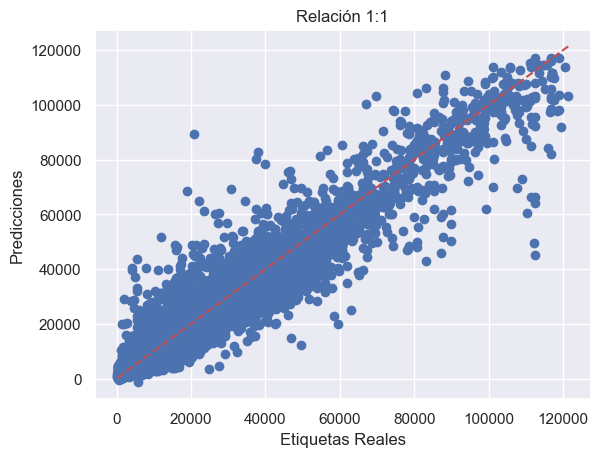

In [159]:
y_true = y_test
y_pred = y_pred
# Calcular los errores
errors = y_true - y_pred

# Graficar la relación 1:1
plt.scatter(y_true, y_pred, color='b')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='r', linestyle='--')

# Configurar etiquetas y título del gráfico
plt.xlabel('Etiquetas Reales')
plt.ylabel('Predicciones')
plt.title('Relación 1:1')

# Mostrar el gráfico
plt.grid(True)
plt.show()


### PIPELINE GridSearch RandomForestRegressor

In [160]:
rf = RandomForestRegressor()

pipeline_RF = Pipeline(steps=[("preprocessor", column_processor), ("Regresion", rf)])
pipeline_RF.fit(X_Train, y_train)
y_pred = pipeline_RF.predict(X_Test)



param_grid = {
    'Regresion__n_estimators': [100, 200, 300],
    'Regresion__max_depth': [None, 5, 10],
    #'Regresion__min_samples_split': [2, 5, 10],
    #'Regresion__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline_RF, param_grid, cv=3, verbose=2, n_jobs=4)

In [161]:
grid_search.fit(X_Train, y_train)
best_params = grid_search.best_params_
print("Best params:", grid_search.best_params_)
print("Train score:", grid_search.score(X_Train, y_train))
print("Test score:", grid_search.score(X_Test, y_test))

# Predecir los valores de las características de prueba
y_pred = pipeline_RF.predict(X_Test)

# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R^2:', r2)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best params: {'Regresion__max_depth': None, 'Regresion__n_estimators': 200}
Train score: 0.9860511404362613
Test score: 0.9254727293509912
Mean Squared Error (MSE): 20398509.93467867
Root Mean Squared Error (RMSE): 4516.47096023861
Mean Absolute Error (MAE): 2431.498459886485
R^2: 0.9245604225687282


In [162]:
pipeline_RF_best = Pipeline(steps=[
    ('preprocessor', column_processor),
    ('regressor', RandomForestRegressor(max_depth = None,n_estimators = 300)) #
])

pipeline_RF_best.fit(X_Train,y_train)

import pickle

# Guardar el modelo en un archivo
with open('models\RF_model.pkl', 'wb') as file:
    pickle.dump(pipeline_RF_best, file)



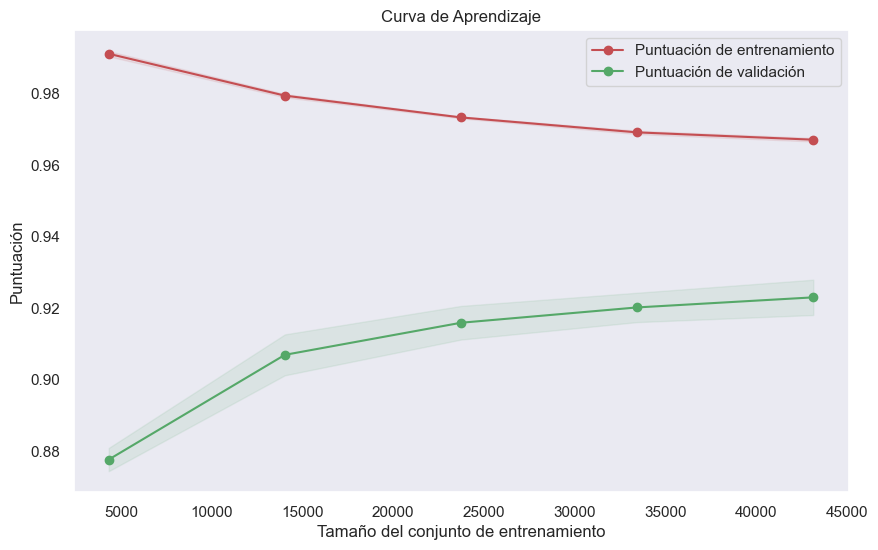

In [163]:
from sklearn.model_selection import learning_curve
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(pipeline_xgb_best, X_Train, y_train, cv=5)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntuación")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de validación")
plt.legend(loc="best")
plt.show()

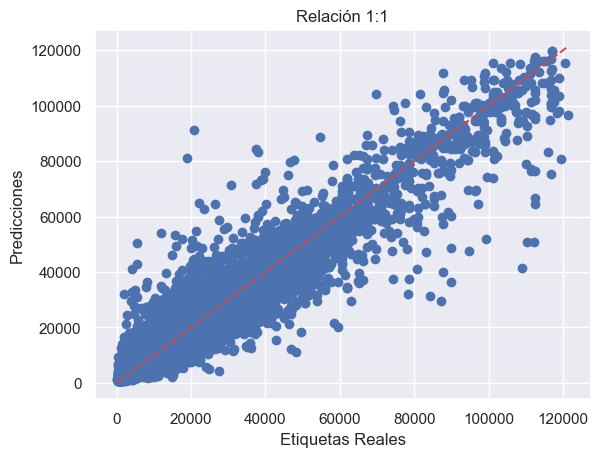

In [164]:
y_true = y_test
y_pred = y_pred
# Calcular los errores
errors = y_true - y_pred

# Graficar la relación 1:1
plt.scatter(y_true, y_pred, color='b')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='r', linestyle='--')

# Configurar etiquetas y título del gráfico
plt.xlabel('Etiquetas Reales')
plt.ylabel('Predicciones')
plt.title('Relación 1:1')

# Mostrar el gráfico
plt.grid(True)
plt.show()



# Crear Modelos XGBoost y RandomForest para cada Marca


In [165]:
param_grid_rf = {
        'Regresion__n_estimators': [100, 200, 300],
        'Regresion__max_depth': [None, 5, 10],
        #'Regresion__min_samples_split': [2, 5, 10],
        #'Regresion__min_samples_leaf': [1, 2, 4]
    }
    
param_grid_XGB = {
    'Regresion__n_estimators': [100, 200, 300],
    'Regresion__learning_rate': [0.01, 0.1, 0.2],
    'Regresion__max_depth': [3, 5, 7],
    'regressor__colsample_bytree': [0.5, 0.7, 1.0],
    'regressor__gamma': [0, 0.1, 0.2]
}
pipeline_RF_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numéricas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Mileage_km', 'Power_HP',
                                                   'Displacement_cm3']),
                                                 ('categóricas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Condition', 'Vehicle_brand',
                                                   'Vehicle_model', 'Fuel_type',
                                                   'Drive', 'Transmission',
                                                   'Type', 'First_owner'])])),
                ('regressor', RandomForestRegressor(n_estimators=300))])

In [166]:
df["Vehicle_brand"].unique()[1:]


array(['Ford', 'Mercedes-Benz', 'Nissan', 'Toyota', 'Volkswagen'],
      dtype=object)

In [167]:
# Configurar los parámetros del modelo
params = {
    "learning_rate": 0.1,
    "max_depth": 3,
    "n_estimators": 100
}




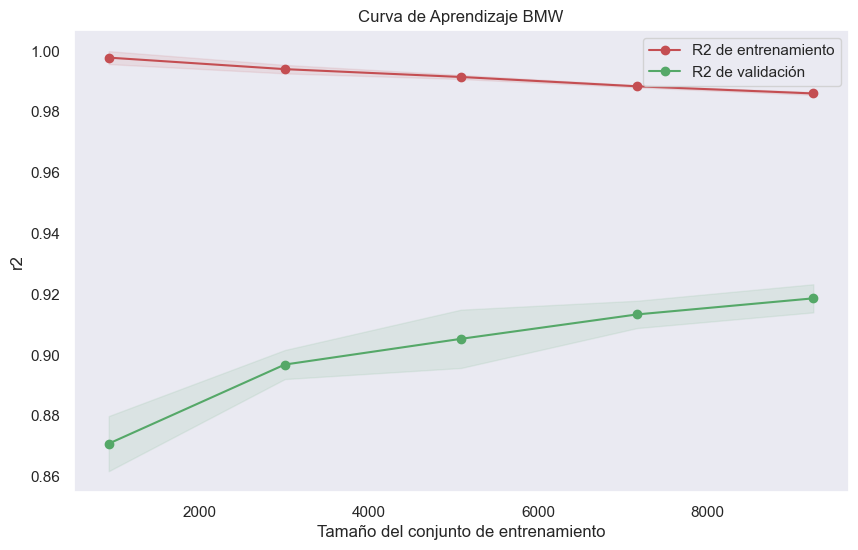

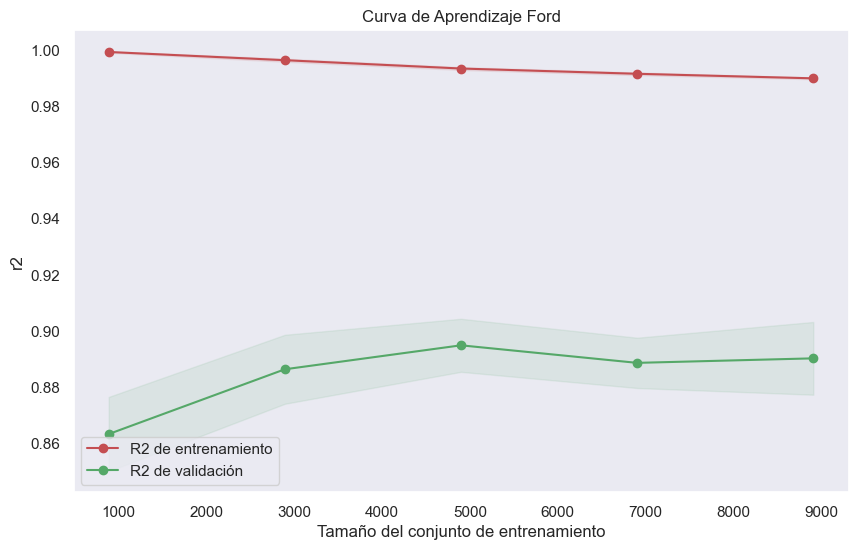

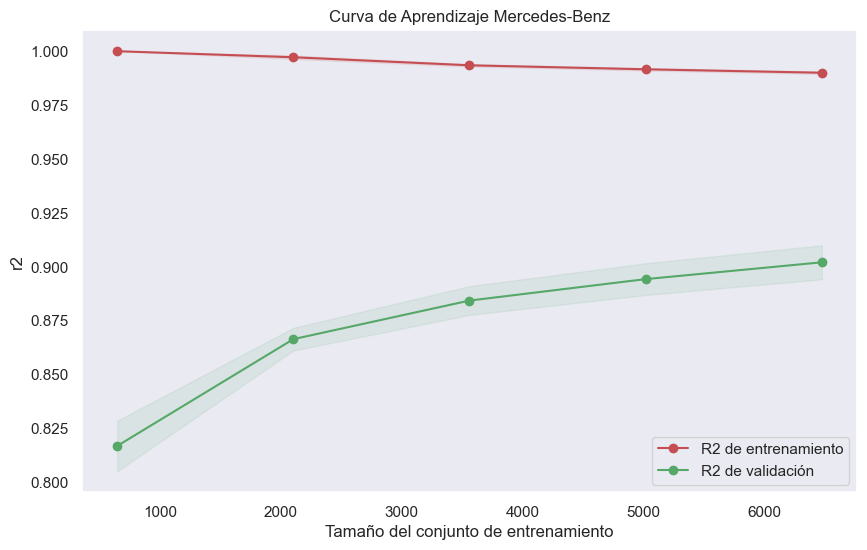

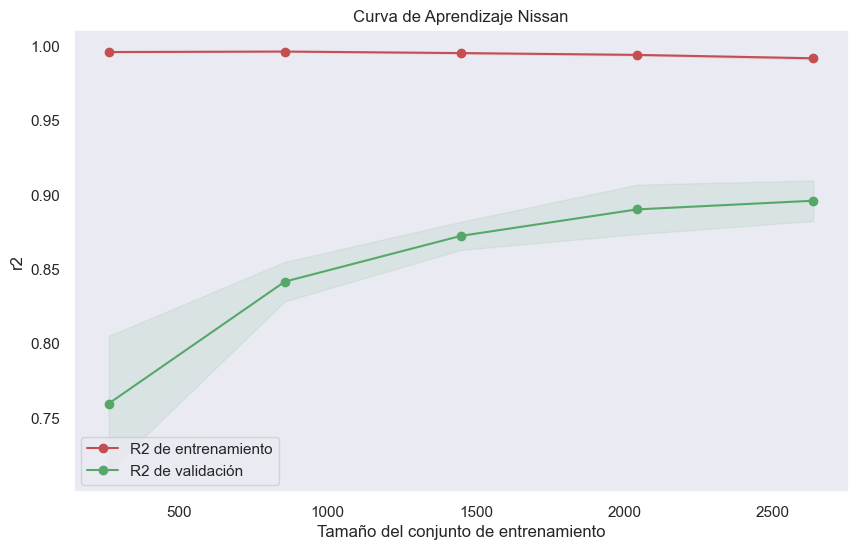

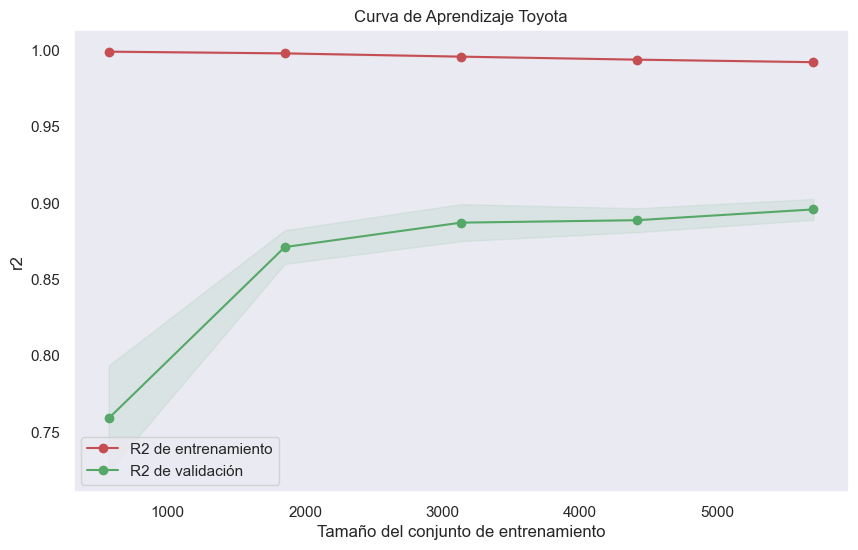

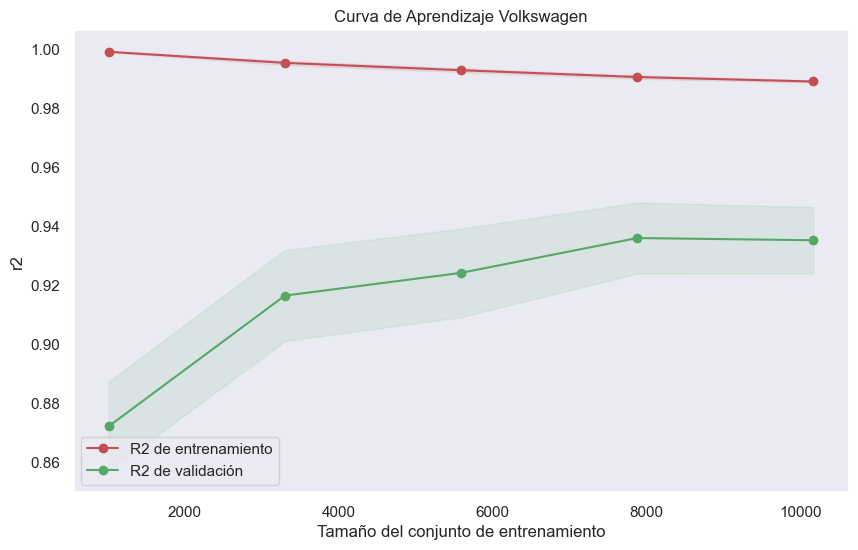

In [168]:
METRICAS = {}

for marca in list(df["Vehicle_brand"].unique()):
    data = df[df["Vehicle_brand"]== marca].copy()
    X = data[data.columns[1:]].copy()
    y = data["Price"].copy()
    X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
    
    
    
    pipeline_RF_best = Pipeline(steps=[
    ('preprocessor', column_processor),
    ('regressor', RandomForestRegressor(max_depth = None,n_estimators = 300)) #
    ])

    pipeline_RF_best.fit(X_Train,y_train)
    y_pred = pipeline_RF_best.predict(X_Test)
    # Calcular métricas de regresión
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    METRICAS[f"{marca}-RANDOMFOREST"] = [mse,rmse,r2,mae]
    
    # Guardar el modelo en un archivo
    with open(f'RandomFostest_{marca}.pkl', 'wb') as file:
        pickle.dump(pipeline_RF_best, file)
              
    ##########################################################
              
    pipeline_xgb_best = Pipeline(steps=[
    ('preprocessor', column_processor),
    ('regressor', XGBRegressor(learning_rate=0.2, max_depth=7, n_estimators= 300))]) #
        
    pipeline_xgb_best.fit(X_Train,y_train)
    y_pred = pipeline_xgb_best.predict(X_Test)
        # Calcular métricas de regresión
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    METRICAS[f"{marca}-XGB"] = [mse,rmse,r2,mae]
    grafica_curva_validacion(X_Train,y_train,pipeline_xgb_best,marca)
    # Guardar el modelo en un archivo
    with open(f'models\XGB_{marca}.pkl', 'wb') as file:
        pickle.dump(pipeline_xgb_best, file)


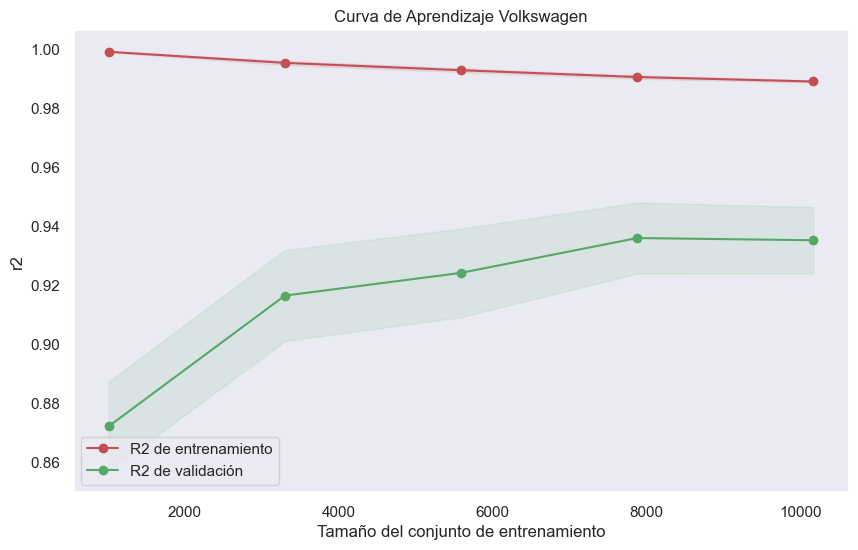

In [169]:
grafica_curva_validacion(X_Train,y_train,pipeline_xgb_best,marca)

# FIN

In [170]:
df_metrics  = pd.DataFrame(METRICAS)

In [171]:
df_metrics = df_metrics.T

In [172]:
df_metrics.rename(columns = {0:"MSE",1:"RMSE",2:"r2",3:"MAE"},inplace = True)

In [173]:
df_metrics.reset_index(inplace = True)

In [174]:
df_metrics

,index,MSE,RMSE,r2,MAE
0,BMW-RANDOMFOREST,32180598.51,5672.79,0.93,3333.56
1,BMW-XGB,31382403.29,5602.00,0.93,3261.92
2,Ford-RANDOMFOREST,8689584.98,2947.81,0.92,1620.30
3,Ford-XGB,9264174.31,3043.71,0.91,1584.60
4,Mercedes-Benz-RANDOMFOREST,43457802.44,6592.25,0.91,3776.63
5,Mercedes-Benz-XGB,42325145.13,6505.78,0.92,3732.29
6,Nissan-RANDOMFOREST,7715064.62,2777.60,0.86,1498.83
7,Nissan-XGB,6454543.74,2540.58,0.88,1507.88
8,Toyota-RANDOMFOREST,6753624.79,2598.77,0.92,1563.50
9,Toyota-XGB,6970159.36,2640.11,0.92,1548.79


In [175]:
#df_metrics = df_metrics.T.reset_index()


In [176]:
df_metrics["marca"] = [0,0,1,1,2,2,3,3,4,4,5,5]

In [177]:
df_metrics["Model"] = ["Random Forest","XGBOOST","Random Forest","XGBOOST","Random Forest","XGBOOST","Random Forest","XGBOOST","Random Forest","XGBOOST","Random Forest","XGBOOST"]

In [178]:
df_metrics["index"] = ["BMW","BMW","Ford","Ford","Mercedes-Benz","Mercedes-Benz","Nissan","Nissan","Toyota","Toyota","Volkwagen","Volkwagen"]

In [179]:
df_metrics.rename(columns = {"index":"Marca_Coche"},inplace = True)

In [180]:
df_metrics

,Marca_Coche,MSE,RMSE,r2,MAE,marca,Model
0,BMW,32180598.51,5672.79,0.93,3333.56,0,Random Forest
1,BMW,31382403.29,5602.00,0.93,3261.92,0,XGBOOST
2,Ford,8689584.98,2947.81,0.92,1620.30,1,Random Forest
3,Ford,9264174.31,3043.71,0.91,1584.60,1,XGBOOST
4,Mercedes-Benz,43457802.44,6592.25,0.91,3776.63,2,Random Forest
5,Mercedes-Benz,42325145.13,6505.78,0.92,3732.29,2,XGBOOST
6,Nissan,7715064.62,2777.60,0.86,1498.83,3,Random Forest
7,Nissan,6454543.74,2540.58,0.88,1507.88,3,XGBOOST
8,Toyota,6753624.79,2598.77,0.92,1563.50,4,Random Forest
9,Toyota,6970159.36,2640.11,0.92,1548.79,4,XGBOOST


In [181]:
# Ordenar el DataFrame por la columna "RMSE"
plt.figure(figsize = (10,5))
df_metrics_sorted = df_metrics.sort_values(by="r2", ascending=True)

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(data=df_metrics_sorted, y="Model", x="r2", hue="Marca_Coche")
ax.set(title="Metricas RMSE por Marca")
plt.xticks(rotation=86)

# Agregar los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center')

plt.show()

In [182]:
plt.figure(figsize=(10, 8))
"""
# Configurar el estilo de fondo
sns.set_style("whitegrid")  # Opcional: Establecer un estilo de fondo, en este caso, "whitegrid"
sns.set_palette("pastel")  # Opcional: Establecer una paleta de colores, en este caso, "pastel"
plt.rcParams['axes.facecolor'] = 'blue'  # Establecer el fondo a color morado
"""
df_metrics_sorted = df_metrics.sort_values(by="RMSE", ascending=True)

# Crear el gráfico de barras con Seaborn y establecer el color del marco
ax = sns.barplot(data=df_metrics_sorted, y="Model", x="RMSE", hue="Marca_Coche", edgecolor='purple')
ax.set(title="Metricas RMSE por Marca")
plt.xticks(rotation=86)

# Cambiar el color del marco de los ejes a morado
ax.spines['bottom'].set_color('purple')
ax.spines['left'].set_color('purple')
ax.spines['top'].set_color('purple')
ax.spines['right'].set_color('purple')

# Agregar los valores en las barras al final de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(5, 0), 
                textcoords='offset points', ha='left', va='center')

plt.savefig("metr.png")
plt.show()

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Definir el rango de valores para el hiperparámetro
param_range = np.arange(1, 20, 2)  # Reemplaza con el rango adecuado para tu hiperparámetro

# Obtener los scores de validación cruzada para diferentes valores del hiperparámetro
train_scores, valid_scores = validation_curve(
    estimator=pipeline_xgb_best,
    X=X_Train, y=y_train,  # Reemplaza X_train e y_train con tus datos de entrenamiento
    param_name='regressor__n_estimators',  # Reemplaza 'xgbregressor__n_estimators' con el nombre real del hiperparámetro
    param_range=param_range,
    cv=5,  # Reemplaza con el número de splits deseados para la validación cruzada
    scoring='neg_mean_squared_error',  # Reemplaza con la métrica de evaluación deseada
    n_jobs=-1
)

# Calcular las medias y desviaciones estándar de los scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Trazar la curva de validación
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label='Training Error', color='blue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(param_range, valid_mean, label='Validation Error', color='red')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='red')
plt.xlabel('Valor del Hiperparámetro')
plt.ylabel('Score')
plt.title('Curva de Validación')
plt.legend(loc='best')
plt.show()


In [184]:
X_Train

In [185]:
# Obtener el modelo XGBoost Regressor del pipeline
xgb_model = pipeline_xgb_best.named_steps['regressor']

# Obtener las características de importancia
importance = xgb_model.feature_importances_

# Obtener los nombres de las características desde el transformador OneHotEncoder
onehot_encoder = pipeline_xgb_best.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder']
feature_names = onehot_encoder.get_feature_names_out(input_features=cat_features)
test = np.concatenate((num_features,feature_names),axis = None)
# Ordenar las características por importancia descendente
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = test[sorted_indices]

subset = pd.DataFrame([test,importance])
subset = subset.T.sort_values(by = 1,ascending = False)
subset.rename(columns = {0:"Features",1:"Importance"},inplace = True)

In [186]:
subset = subset.head(10)

In [187]:
sns.barplot(data = subset, x="Features",y = "Importance")

In [188]:
test = np.concatenate((num_features,feature_names),axis = None)

In [189]:
test

In [190]:
num_features.append(feature_names)

In [191]:
num_features

In [192]:
with open(f'models\XGB_Nissan.pkl', 'rb') as f:
            pipeline_xgb_best = pickle.load(f)

In [193]:
pipeline_xgb_best

In [ ]:
data = df[df["Vehicle_brand"] == "BMW"]

In [219]:

#start_train  = time.time()

end_train = time.time()